In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DATA/Bakery Sales.csv')

In [3]:
df = df.drop('place',axis=1)

In [31]:
df = df.dropna(subset=['datetime','day of week'])

In [33]:
df = df.fillna(0)

In [34]:
df.isnull().sum()

datetime              0
day of week           0
total                 0
angbutter             0
plain bread           0
jam                   0
americano             0
croissant             0
caffe latte           0
tiramisu croissant    0
cacao deep            0
pain au chocolat      0
almond croissant      0
croque monsieur       0
mad garlic            0
milk tea              0
gateau chocolat       0
pandoro               0
cheese cake           0
lemon ade             0
orange pound          0
wiener                0
vanila latte          0
berry ade             0
tiramisu              0
merinque cookies      0
dtype: int64

## DATA PREPROCESSING

In [35]:
df['datetime']

0       2019-07-11 15:35
1       2019-07-11 16:10
2       2019-07-12 11:49
3       2019-07-13 13:19
4       2019-07-13 13:22
              ...       
2415    2020-05-02 11:37
2416    2020-05-02 11:39
2417    2020-05-02 12:15
2418    2020-05-02 13:45
2419    2020-05-02 14:45
Name: datetime, Length: 2420, dtype: object

In [55]:
df['datetime'].str.split('-')[0][2].split(':')[0].split()[1]

'15'

In [57]:
def hour(x):
    return x.split('-')[2].split(':')[0].split()[1]
df['hour'] = df['datetime'].apply(lambda x:hour(x))
df['hour'].value_counts()

11    706
12    552
13    446
14    343
15    219
16    125
17     27
22      1
23      1
Name: hour, dtype: int64

In [50]:
def year(x):
    return x.split('-')[0]
df['year'] = df['datetime'].apply(lambda x:year(x))
df['year'].value_counts()

2019    1331
2020    1089
Name: year, dtype: int64

In [52]:
def month(x):
    return x.split('-')[1]
df['month'] = df['datetime'].apply(lambda x:month(x))
df['month'].value_counts()

03    314
02    307
08    294
12    244
04    236
09    235
11    225
01    217
10    198
07    135
05     15
Name: month, dtype: int64

In [60]:
df.columns

Index(['day of week', 'total', 'angbutter', 'plain bread', 'jam', 'americano',
       'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep',
       'pain au chocolat', 'almond croissant', 'croque monsieur', 'mad garlic',
       'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade',
       'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu',
       'merinque cookies', 'year', 'month', 'hour'],
      dtype='object')

In [63]:
year_df = df.groupby('year').mean().transpose()

In [64]:
year_df['diff'] = year_df['2020'] - year_df['2019']

In [66]:
year_df.sort_values('diff',ascending=False)

year,2019,2020,diff
plain bread,0.384673,0.473829,0.089156
tiramisu croissant,0.361382,0.426079,0.064697
cacao deep,0.133734,0.170799,0.037065
americano,0.198347,0.228650,0.030303
cheese cake,0.025545,0.053260,0.027715
orange pound,0.222389,0.247934,0.025545
vanila latte,0.097671,0.101928,0.004257
berry ade,0.021037,0.024793,0.003757
merinque cookies,0.018783,0.022039,0.003256
pandoro,0.162284,0.163453,0.001169


In [106]:
def day(x):
    if x == 'Mon':
        return 1
    elif x == 'Wed':
        return 3
    elif x == 'Thur':
        return 4
    elif x == 'Fri':
        return 5
    elif x == 'Sat':
        return 6
    else:
        return 0
df['day'] = df['day of week'].apply(lambda x:day(x))

In [108]:
df = df.drop('day of week',axis=1)

## OUTLIER DETECTION

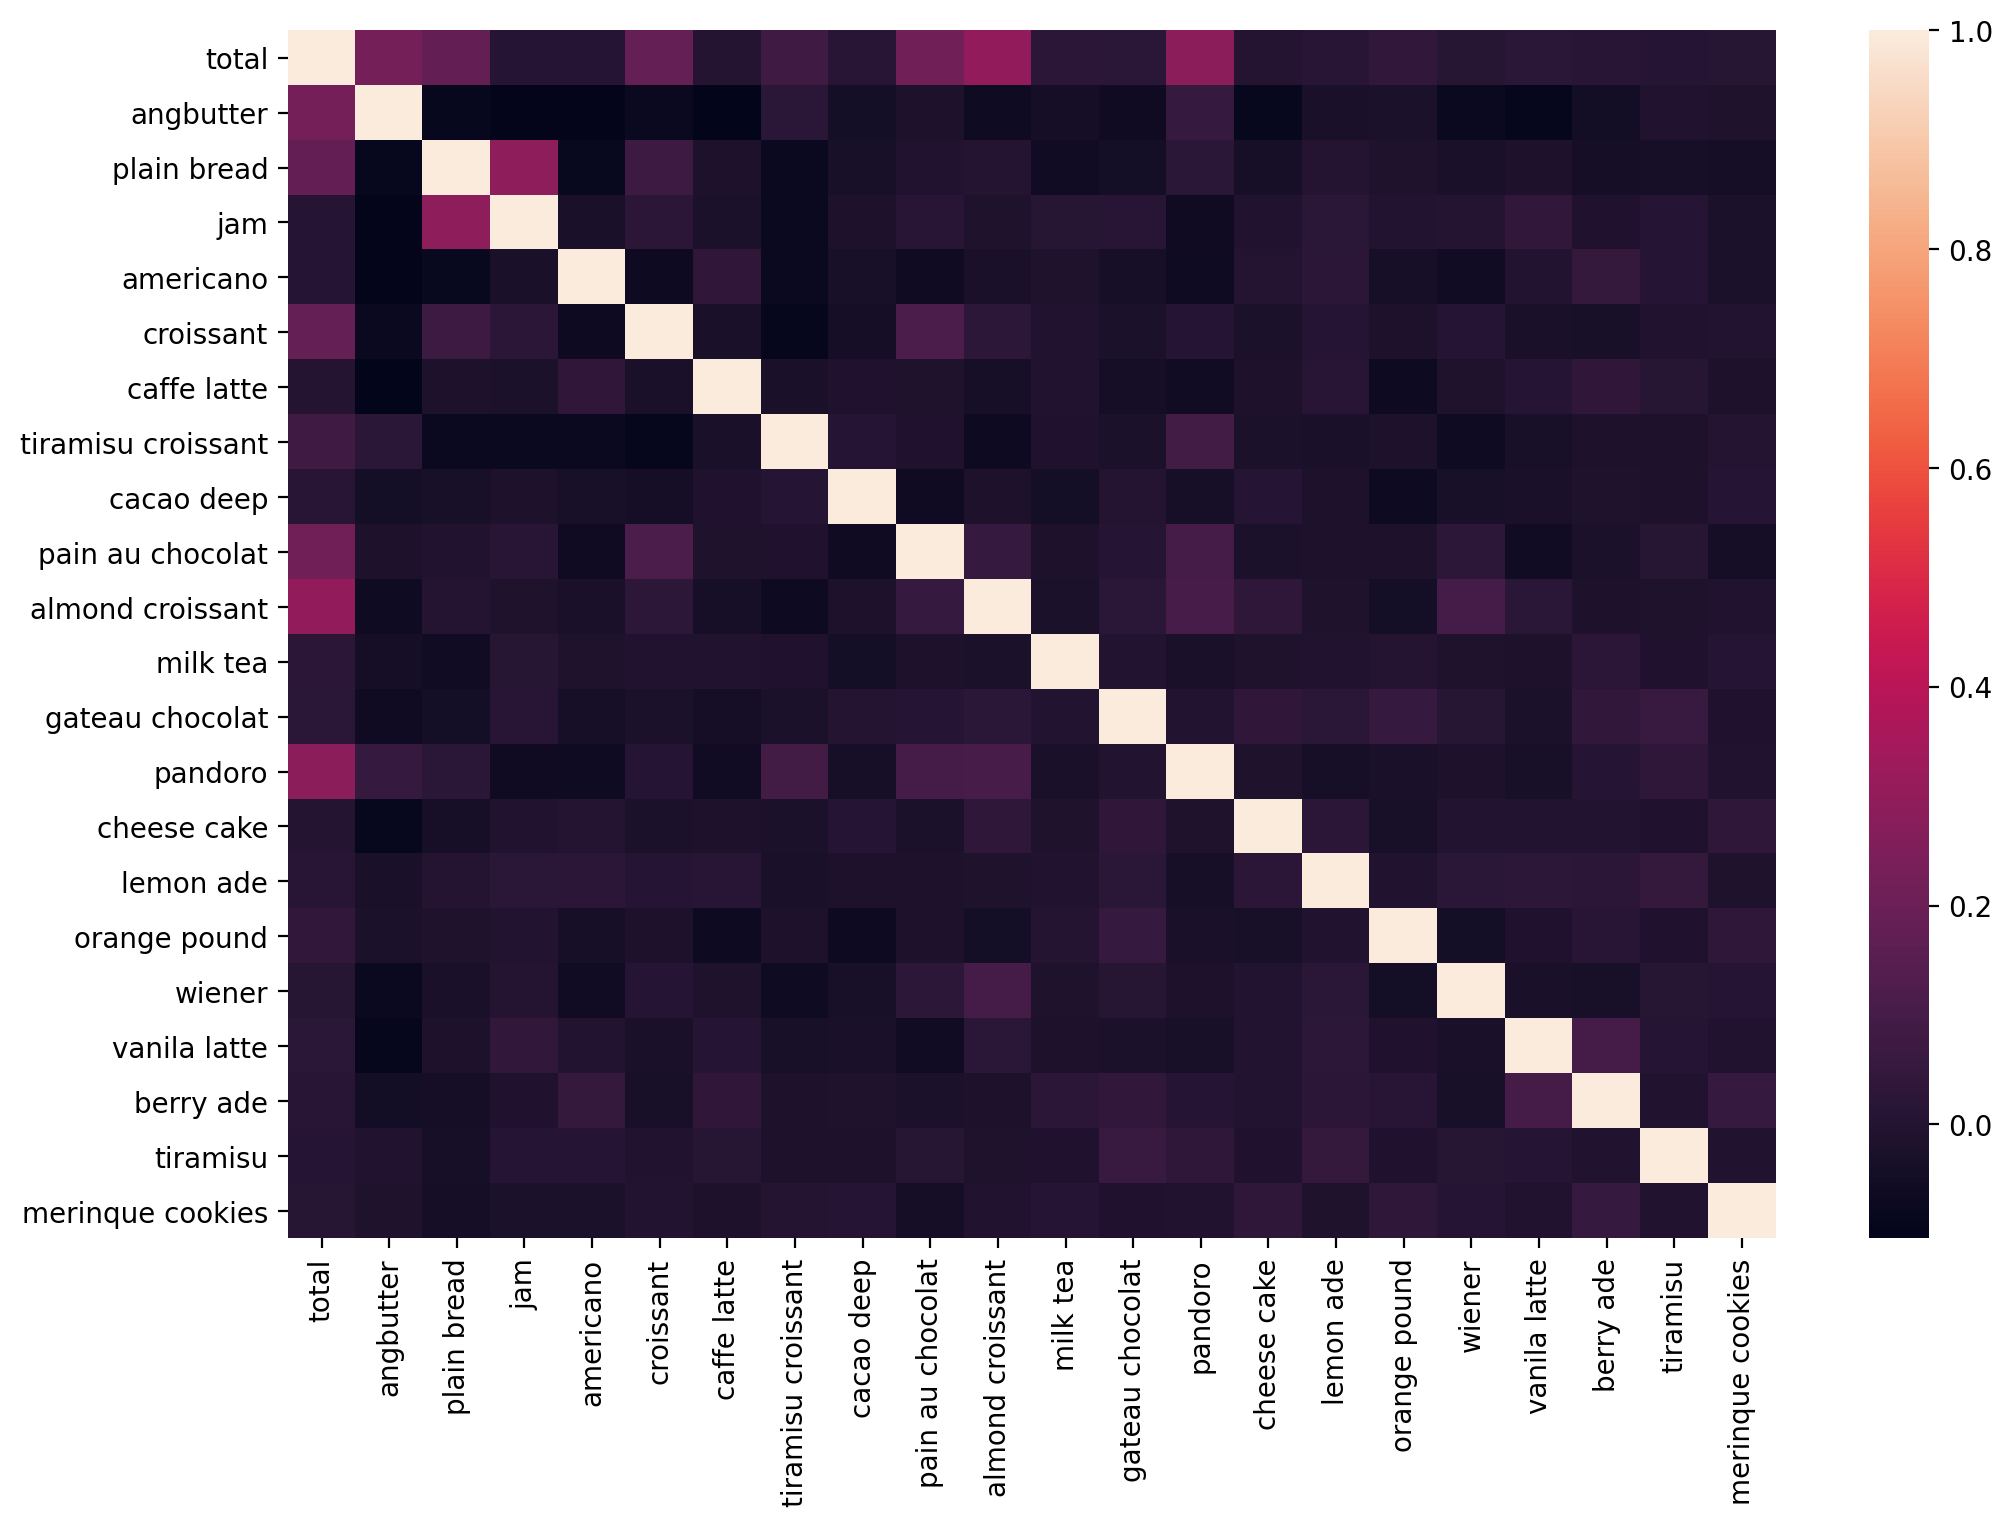

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
corr = corr.drop(['mad garlic','croque monsieur'])
corr = corr.drop(['croque monsieur','mad garlic'],axis=1)
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(corr)
plt.savefig('corr.png')

In [84]:
df.groupby('hour').mean()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
hour,,,,,,,,,,,,,,,,,,,,,
11,23409.773371,1.398017,0.424929,0.089235,0.201133,0.490085,0.072238,0.477337,0.145892,0.364023,...,0.079320,0.199717,0.033994,0.011331,0.223796,0.267705,0.076487,0.014164,0.002833,0.019830
12,20174.456522,1.248188,0.521739,0.099638,0.188406,0.425725,0.094203,0.353261,0.172101,0.307971,...,0.072464,0.170290,0.038043,0.016304,0.221014,0.173913,0.103261,0.023551,0.005435,0.012681
13,20493.049327,1.327354,0.405830,0.103139,0.230942,0.441704,0.098655,0.434978,0.121076,0.284753,...,0.069507,0.159193,0.035874,0.017937,0.215247,0.170404,0.091928,0.026906,0.002242,0.013453
14,20577.259475,1.323615,0.390671,0.128280,0.250729,0.416910,0.122449,0.309038,0.169096,0.288630,...,0.096210,0.142857,0.037901,0.017493,0.259475,0.139942,0.122449,0.037901,0.002915,0.023324
15,19885.388128,1.429224,0.315068,0.109589,0.196347,0.315068,0.073059,0.347032,0.118721,0.219178,...,0.118721,0.114155,0.027397,0.018265,0.237443,0.196347,0.127854,0.013699,0.000000,0.036530
16,19859.200000,1.256000,0.384000,0.112000,0.264000,0.424000,0.064000,0.224000,0.184000,0.160000,...,0.144000,0.096000,0.072000,0.016000,0.312000,0.128000,0.136000,0.032000,0.000000,0.048000
17,18048.148148,1.074074,0.296296,0.111111,0.074074,0.222222,0.037037,0.296296,0.185185,0.185185,...,0.222222,0.074074,0.111111,0.037037,0.333333,0.296296,0.074074,0.000000,0.000000,0.000000
22,15800.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,35600.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [85]:
df['hour'].unique()

array(['15', '16', '11', '13', '14', '12', '17', '23', '22'], dtype=object)

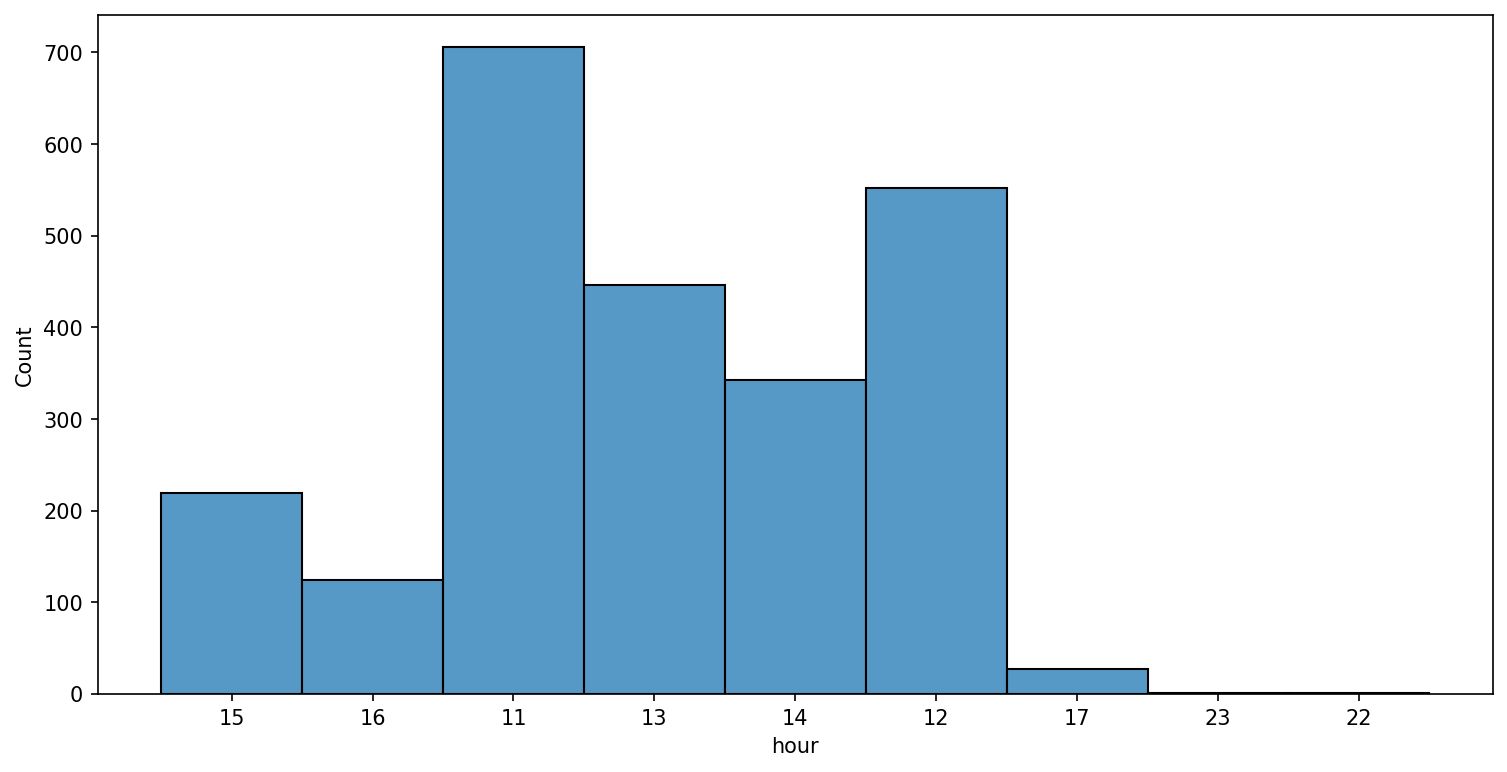

In [88]:
plt.figure(figsize=(12,6),dpi=150)
sns.histplot(x='hour',data=df)
plt.savefig('hours.png')

<AxesSubplot:xlabel='day of week', ylabel='Count'>

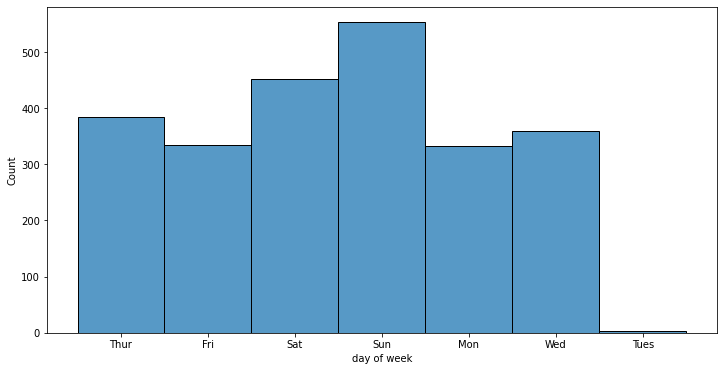

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(x='day of week',data=df)
#Sales on tuesday is an outlier here

## OUTLIER ELIMINATION

In [99]:
# 1721 th row has 22 hours
# 837 th row has 23 hours
df = df.drop([1721,837])

In [103]:
# 1277, 1278 and 1279 rows have Tuesday as their day of week
df = df.drop([1277,1278,1279])

## TESTING VARIOUS MODELS

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [137]:
from sklearn.metrics import mean_absolute_error

In [111]:
X = df.drop('total',axis=1)
y = df['total']

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Model fitting and evaluation

In [152]:
def run_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('MAE: ',mean_absolute_error(y_test,pred))
    print('% of max: ',(mean_absolute_error(y_test,pred)/df['total'].max())*100)

In [153]:
run_model(LinearRegression())

MAE:  2138.2476827257647
% of max:  0.16537105048149767


In [154]:
run_model(DecisionTreeRegressor())

MAE:  5339.862068965517
% of max:  0.4129823719230871


In [155]:
run_model(SVR())

MAE:  6491.305915313065
% of max:  0.5020344868764938


In [156]:
run_model(RandomForestRegressor())

MAE:  4188.916091954023
% of max:  0.32396876194540003


In [157]:
run_model(KNeighborsRegressor())

MAE:  5631.724137931034
% of max:  0.435554844387551


In [158]:
df['total'].max()

1293000.0

Feature Importance

In [167]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pd.DataFrame(data=lr.coef_,index=X.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
cheese cake,4.949088e+03
berry ade,4.946709e+03
angbutter,4.749508e+03
milk tea,4.666063e+03
lemon ade,4.637770e+03
vanila latte,4.580020e+03
almond croissant,4.529114e+03
caffe latte,4.485865e+03
pandoro,4.418573e+03
orange pound,4.416627e+03
